# Import the Dependencies

In [23]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import nltk
import re
import pandas as pd
import seaborn as sns
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')
np.random.seed(2018)

[nltk_data] Downloading package wordnet to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


    Topic modelling is a sort of statistical modelling that is used to locate abstract "themes" in a collection of documents. To assign text in a document to a certain subject, the topic model Latent Dirichlet Allocation (LDA) is utilised. It generates a topic per document and word per topic model based on the Dirichlet distribution.

# Load the Data

In [2]:
data = pd.read_csv('E:/PIP_Devmallya/Week_3/Problem_1/vaccination_all_tweets.csv')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
# Drop the duplicates tweets

data = data.drop_duplicates('text')
data.shape

In [4]:
data.drop(columns={"id","user_name","user_description","user_created","user_followers", "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet", "user_location", "date"},inplace=True)
data.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


# Data Preprocessing

    The following are the steps we'll take:

    Split the text into sentences and the sentences into words using tokenization.

    Remove all punctuation and lowercase the words.

    Words with fewer than three characters are omitted.

    All stopwords have been eliminated.

    Words in the third person are changed to the first person, and verbs in the past and future tenses are changed to the present tense.

    Words are stemmed, which means they are reduced to their simplest form.

In [5]:
def remove_the_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_the_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [6]:
data['clean_tweet'] = data.text.apply(remove_the_links)
data.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine @Bor...


In [7]:
data['clean_tweet'] = data['clean_tweet'].apply(remove_the_users)
data.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're...","Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...,Explain to me again why we need a vaccine #w...


In [8]:
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet):
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    return tweet

In [9]:
data['clean_tweet'] = data['clean_tweet'].apply(clean_tweet)
data.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,"Facts are immutable, Senator, even when you're...",facts are immutable senator even when you re n...
4,Explain to me again why we need a vaccine @Bor...,explain to me again why we need a vaccine #whe...


In [10]:
# Removing hastags
import neattext as ntx
data['clean_tweet'] = data['clean_tweet'].apply(ntx.remove_hashtags)
data.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccine is created to las...
3,"Facts are immutable, Senator, even when you're...",facts are immutable senator even when you re n...
4,Explain to me again why we need a vaccine @Bor...,explain to me again why we need a vaccine


In [11]:
data['clean_tweet'][0]

'same folks said daikon paste could treat a cytokine storm   '

In [13]:
data["clean_tweet"] = data["clean_tweet"].apply(lambda x: x.rstrip())
data.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccine is created to las...
3,"Facts are immutable, Senator, even when you're...",facts are immutable senator even when you re n...
4,Explain to me again why we need a vaccine @Bor...,explain to me again why we need a vaccine


In [14]:
data['clean_tweet'][0]

'same folks said daikon paste could treat a cytokine storm'

    Create a function to preprocess the data set by lemmatizing and stemming it.

In [36]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [37]:
data['index'] = data.index
data.head()

,text,clean_tweet,index
0,Same folks said daikon paste could treat a cyt...,same folks said daikon paste could treat a cyt...,0
1,While the world has been on the wrong side of ...,while the world has been on the wrong side of ...,1
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccine is created to las...,2
3,"Facts are immutable, Senator, even when you're...",facts are immutable senator even when you re n...,3
4,Explain to me again why we need a vaccine @Bor...,explain to me again why we need a vaccine,4


In [38]:
data.drop(columns={"text"},inplace=True)
data.head()

,clean_tweet,index
0,same folks said daikon paste could treat a cyt...,0
1,while the world has been on the wrong side of ...,1
2,russian vaccine is created to las...,2
3,facts are immutable senator even when you re n...,3
4,explain to me again why we need a vaccine,4


In [48]:
print(len(data['index']))

226373


    Select a data to preview after preprocessing.

In [52]:
doc_sample = data[data['index'] == 220000].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['did', 'you', 'know', 'every', '', 'seconds', 'one', 'woman', 'dies', 'during', 'pregnancy', 'or', 'childbirth']


 tokenized and lemmatized document: 
['know', 'second', 'woman', 'die', 'pregnanc', 'childbirth']


    Save the results as 'processed docs' after preprocessing the headline clean tweet.

In [53]:
processed_docs = data['clean_tweet'].map(preprocess)

In [54]:
processed_docs[:10]

0     [folk, say, daikon, past, treat, cytokin, storm]
1    [world, wrong, histori, year, hope, biggest, v...
2                       [russian, vaccin, creat, year]
3    [fact, immut, senat, ethic, sturdi, acknowledg...
4                              [explain, need, vaccin]
5    [use, advic, guidanc, covid, vaccin, safe, whi...
6    [claim, fame, success, patriot, competit, canada]
7                             [bright, day, best, win]
8                                 [covid, vaccin, get]
9                     [state, start, get, monday, say]
Name: clean_tweet, dtype: object

# Word Cloud Visualization

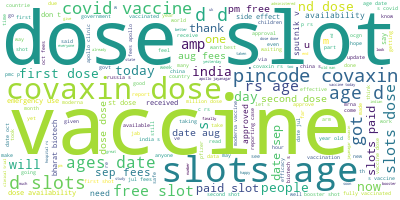

In [55]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(data['clean_tweet'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# Bag of words on the dataset

    Made a dictionary containing the number of times each term appears in the 'processed documents' folder's training set.

In [56]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [57]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 cytokin
1 daikon
2 folk
3 past
4 say
5 storm
6 treat
7 biggest
8 effort
9 histori
10 hope


In [58]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

    We generate a dictionary for each text that reports how many words and how many times those terms occur. Save this to 'bow corpus,' and then double-check the document we chose earlier.

In [59]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[220000]

[(510, 1), (671, 1), (1956, 2), (2042, 1), (3498, 1)]

In [62]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 9 ("vaccin") appears 1 time.
Word 46 ("peopl") appears 1 time.
Word 82 ("deliv") appears 1 time.
Word 221 ("number") appears 1 time.
Word 408 ("live") appears 1 time.
Word 566 ("forget") appears 1 time.
Word 1130 ("play") appears 1 time.
Word 1251 ("focus") appears 1 time.


# TF-IDF

    Using models, create a tf-idf model object. Apply TfidfModel to 'bow corpus' and save it as 'tfidf', then change the full corpus and name it 'corpus tfidf'. Finally, we look at our first document's TF-IDF scores.

In [63]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [64]:
corpus_tfidf = tfidf[bow_corpus]

In [65]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.42339823458693265),
 (1, 0.42112256575478146),
 (2, 0.23341418421690635),
 (3, 0.5952346596625869),
 (4, 0.48435858421576344)]


# Running LDA using Bag of Words

In [66]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

    We'll look at the terms that appear in each topic and their respective weight.

In [67]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.179*"pincod" + 0.120*"dose" + 0.101*"vaccin" + 0.034*"thank" + 0.030*"fulli" + 0.026*"today" + 0.022*"wait" + 0.021*"million" + 0.018*"receiv" + 0.018*"final"
Topic: 1 
Words: 0.090*"vaccin" + 0.056*"year" + 0.040*"avail" + 0.028*"day" + 0.025*"receiv" + 0.024*"best" + 0.018*"die" + 0.015*"covid" + 0.013*"peopl" + 0.012*"take"
Topic: 2 
Words: 0.112*"approv" + 0.059*"vaccin" + 0.042*"health" + 0.029*"emerg" + 0.021*"countri" + 0.019*"covid" + 0.018*"author" + 0.015*"india" + 0.014*"boost" + 0.013*"grant"
Topic: 3 
Words: 0.196*"covaxin" + 0.176*"date" + 0.170*"fee" + 0.045*"dose" + 0.029*"report" + 0.027*"case" + 0.017*"canada" + 0.011*"rxdx" + 0.008*"aarthi" + 0.007*"open"
Topic: 4 
Words: 0.301*"slot" + 0.188*"dose" + 0.118*"free" + 0.095*"avail" + 0.059*"pay" + 0.012*"feel" + 0.009*"road" + 0.007*"hour" + 0.007*"shoot" + 0.007*"sore"
Topic: 5 
Words: 0.105*"age" + 0.072*"vaccin" + 0.032*"peopl" + 0.031*"need" + 0.022*"covid" + 0.020*"like" + 0.017*"kid" + 0.015*"p

# Running LDA using TF-IDF

In [68]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [69]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.022*"effect" + 0.016*"studi" + 0.016*"vaccin" + 0.013*"covid" + 0.012*"data" + 0.012*"efficaci" + 0.012*"variant" + 0.011*"trial" + 0.011*"delta" + 0.010*"show"
Topic: 1 Word: 0.135*"slot" + 0.101*"dose" + 0.087*"free" + 0.075*"avail" + 0.059*"covaxin" + 0.058*"fee" + 0.057*"age" + 0.057*"date" + 0.048*"pay" + 0.024*"apollo"
Topic: 2 Word: 0.027*"need" + 0.024*"booster" + 0.020*"travel" + 0.017*"best" + 0.016*"vaccin" + 0.014*"approv" + 0.013*"world" + 0.012*"boost" + 0.009*"time" + 0.008*"heal"
Topic: 3 Word: 0.054*"vaccin" + 0.034*"shoot" + 0.031*"dose" + 0.030*"second" + 0.029*"today" + 0.021*"day" + 0.021*"receiv" + 0.021*"good" + 0.018*"hosp" + 0.017*"feel"
Topic: 4 Word: 0.042*"approv" + 0.018*"emerg" + 0.015*"list" + 0.014*"vaccin" + 0.013*"ocgn" + 0.011*"kid" + 0.011*"recommend" + 0.010*"india" + 0.009*"columbia" + 0.008*"grant"
Topic: 5 Word: 0.019*"case" + 0.019*"canada" + 0.015*"aarthi" + 0.014*"want" + 0.013*"scan" + 0.013*"report" + 0.012*"vaccin" + 0.011*

# Evaluation of performance using the LDA Bag of Words model to categorise a sample data

In [70]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4015153646469116	 
Topic: 0.105*"age" + 0.072*"vaccin" + 0.032*"peopl" + 0.031*"need" + 0.022*"covid" + 0.020*"like" + 0.017*"kid" + 0.015*"pfizer" + 0.014*"moderna" + 0.014*"mrna"

Score: 0.3558349311351776	 
Topic: 0.179*"pincod" + 0.120*"dose" + 0.101*"vaccin" + 0.034*"thank" + 0.030*"fulli" + 0.026*"today" + 0.022*"wait" + 0.021*"million" + 0.018*"receiv" + 0.018*"final"

Score: 0.1648460477590561	 
Topic: 0.090*"vaccin" + 0.056*"year" + 0.040*"avail" + 0.028*"day" + 0.025*"receiv" + 0.024*"best" + 0.018*"die" + 0.015*"covid" + 0.013*"peopl" + 0.012*"take"

Score: 0.011118955910205841	 
Topic: 0.041*"vaccin" + 0.032*"good" + 0.032*"news" + 0.030*"ocgn" + 0.017*"effect" + 0.015*"great" + 0.013*"variant" + 0.012*"delta" + 0.011*"updat" + 0.011*"mrna"

Score: 0.011116639710962772	 
Topic: 0.051*"approv" + 0.048*"vaccin" + 0.042*"india" + 0.027*"covaxin" + 0.027*"biotech" + 0.026*"bharat" + 0.020*"data" + 0.018*"covid" + 0.016*"list" + 0.016*"ocgn"

Score: 0.01111408602446317

# Evaluation of performance using the LDA TF-IDF model to categorise a sample data

In [71]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.5658981204032898	 
Topic: 0.027*"need" + 0.024*"booster" + 0.020*"travel" + 0.017*"best" + 0.016*"vaccin" + 0.014*"approv" + 0.013*"world" + 0.012*"boost" + 0.009*"time" + 0.008*"heal"

Score: 0.3451835513114929	 
Topic: 0.018*"vaccin" + 0.014*"million" + 0.011*"arriv" + 0.010*"covid" + 0.009*"china" + 0.009*"approv" + 0.009*"countri" + 0.009*"choic" + 0.009*"receiv" + 0.009*"recognis"

Score: 0.011118290014564991	 
Topic: 0.022*"effect" + 0.016*"studi" + 0.016*"vaccin" + 0.013*"covid" + 0.012*"data" + 0.012*"efficaci" + 0.012*"variant" + 0.011*"trial" + 0.011*"delta" + 0.010*"show"

Score: 0.01111586857587099	 
Topic: 0.016*"approv" + 0.015*"vaccin" + 0.014*"forti" + 0.013*"tradit" + 0.012*"sector" + 0.012*"dose" + 0.011*"congratul" + 0.010*"japan" + 0.010*"marg" + 0.010*"inactiv"

Score: 0.011114854365587234	 
Topic: 0.054*"vaccin" + 0.034*"shoot" + 0.031*"dose" + 0.030*"second" + 0.029*"today" + 0.021*"day" + 0.021*"receiv" + 0.021*"good" + 0.018*"hosp" + 0.017*"feel"

Sco

    Our test document had the highest probability of belonging to the topic that our model assigned, showing that it was successfully categorised.

# Model validation on a previously unseen data

In [72]:
unseen_document = 'The Janssen COVID19 fact sheets have been updated to include contraindications for people with a history of thrombosis with thrombocytopenia following the Janssen COVID19 Vaccine or any other adenovirus-vectored COVID19 vaccine.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.4270382821559906	 Topic: 0.105*"age" + 0.072*"vaccin" + 0.032*"peopl" + 0.031*"need" + 0.022*"covid"
Score: 0.2041189968585968	 Topic: 0.051*"approv" + 0.048*"vaccin" + 0.042*"india" + 0.027*"covaxin" + 0.027*"biotech"
Score: 0.1774495244026184	 Topic: 0.090*"vaccin" + 0.056*"year" + 0.040*"avail" + 0.028*"day" + 0.025*"receiv"
Score: 0.1580325812101364	 Topic: 0.041*"vaccin" + 0.032*"good" + 0.032*"news" + 0.030*"ocgn" + 0.017*"effect"
